# Jawaban no 3

# Penjelasan: 
Pengolahan data untuk menentukan ukuran audio menggunakan package os.path.getsize yaitu untuk menampilkan ukuran file yang ada pada alamat path di sistem komputer penentuan durasi dari audio menggunakan hasil perbandingan frame audio dengan framerate dalam bentuk float menentukan sample rate menggunakan modul soindfile yang dapat membaca dan memutar audio dalam mp3 atau wav untuk melakukan analisa data menggunakan rfft yang merupakan bagian dari scipy.fft dimana modul ini melakukan diskrit transformasi dalam bentuk array dan hanya melakukan Transformasi pada nilai real 'r' bukan bilangan kompleks selanjutnya nilai amplituodo didapat dari nilai absolut dari proses fft, sehingga dapat diplot amplitudo vs frekuensi dengan frekuensi yang ada pada audio yaitu 200 Hz, 600 Hz, dan 1000 Hz

# Menentukan ukuran audio

In [20]:
# import library yang dibutuhkan
import numpy as np
import scipy.fft as fft
import soundfile as sf
import matplotlib.pyplot as plt
import os
import wave

# tentukan nama file
data = "/kaggle/input/soundwav/note_08_20222017.wav"

# mendapatkan ukuran file dalam bytes
ukuran_file = os.path.getsize(data)

print(f"size audio {data} adalah {ukuran_file} bytes.")

size audio /kaggle/input/soundwav/note_08_20222017.wav adalah 352844 bytes.


# Menentukan durasi audio

In [21]:
# membuka file audio wav
with wave.open(data, 'r') as wave_file:
    
    # mendapatkan jumlah frame
    frames = wave_file.getnframes()
    
    # mendapatkan framerate
    framerate = wave_file.getframerate()
    
    # menghitung durasi
    duration = frames / float(framerate)
    print(f'Durasi audio: {duration} detik')


Durasi audio: 4.0 detik


# Menentukan sample rate audio

In [22]:
# membuka file audio
audio_data, samplerate = sf.read(data)

# mencetak sample rate
print(f'Sample rate audio: {samplerate} Hz')

Sample rate audio: 44100 Hz


# Melakukan FFT dan Menentukan frekuensi audio

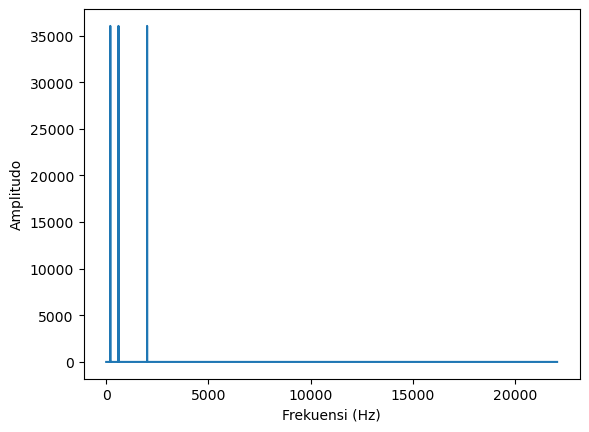

In [23]:
# membaca file audio
audio_data, samplerate = sf.read(data)
audio_data_copy = audio_data.copy()

# mengubah data audio menjadi mono (jika stereo)
if len(audio_data_copy.shape) > 1:
    audio_data_copy = np.mean(audio_data_copy, axis=1)

# menghitung nilai FFT dari data audio
fft_data = fft.rfft(audio_data_copy)

# menghitung nilai amplitudo dari FFT
amplitude = np.abs(fft_data)

# menghitung nilai frekuensi dari FFT
freqs = fft.rfftfreq(len(audio_data_copy), d=1/samplerate)

# membuat plot amplitudo vs frekuensi
plt.plot(freqs, amplitude)
plt.xlabel('Frekuensi (Hz)')
plt.ylabel('Amplitudo')
plt.show()


In [24]:
import soundfile as sf
import numpy as np

audio, samplerate = sf.read(data)

from scipy.fft import rfft

X = rfft(audio)
N = len(audio)
freqs = np.fft.fftfreq(N, d=1/samplerate)[:N//2+1]
peak_indices = np.argsort(np.abs(X))[-3:]
peak_freqs = freqs[peak_indices]
print("frekuensi audio adalah:")
for freq in peak_freqs:
    print("{:.2f} Hz".format(freq))


frekuensi audio adalah:
600.00 Hz
2000.00 Hz
200.00 Hz


 ######

# Jawaban no 4 image PNG

# Penjelasan: 
Pengolahan data untuk menentukan ukuran gambar menggunakan package os.path.getsize yaitu untuk menampilkan ukuran file yang ada pada alamat path di sistem komputer penentuan ukuran citra yang tersimpan dari gambar menggunakan modul PIL (pillow image Library) yang dapat membaca foto dengan berbagai format salah satunya adalah PNG, ukuran citra didapat dari width dan height, sedangkan untu format citra menggunakan image mode. Selanjutnya analisa menggunakan fft dilakukan dengan merubah gambar dalam bentuk array, selanjutnya data array di fft dan dicari frekuensi untuk komponen x dan komponen y nya, selanjutnya data array dinormalisasi dan ditampilkan dan kemudian hasil diplot dengan membandingkan gambar asli dan spektrum gambar fft.

# Menentukan ukuran berkas

In [25]:
# Import library
import matplotlib.pyplot as plt
from scipy import fftpack
import numpy as np

# tentukan nama file
foto = '/kaggle/input/imagepng/20222017.png'

# menentukan ukuran file dalam byte
ukuran = os.path.getsize(foto)

print(f"ukuran file {ukuran} bytes")

ukuran file 3946 bytes


# Menentukan ukuran citra

In [26]:
# library
from PIL import Image

# memuat foto
img = Image.open(foto)

# ukuran citra
width, height = img.size
print("Ukuran citra: width {} x height {}".format(width, height))


Ukuran citra: width 100 x height 100


# Menentukan format pixel yang tersimpan dalam berkas

In [27]:
# menentukan format piksel citra
mode = img.mode
print("Format pixel citra: {}".format(mode))


Format pixel citra: RGBA


# Melakukan FFT

[[[0.5019608  0.5019608  0.5019608  1.        ]
  [0.54901963 0.54901963 0.54901963 1.        ]
  [0.6        0.6        0.6        1.        ]
  ...
  [0.35686275 0.35686275 0.35686275 1.        ]
  [0.4        0.4        0.4        1.        ]
  [0.4509804  0.4509804  0.4509804  1.        ]]

 [[0.56078434 0.56078434 0.56078434 1.        ]
  [0.60784316 0.60784316 0.60784316 1.        ]
  [0.65882355 0.65882355 0.65882355 1.        ]
  ...
  [0.4117647  0.4117647  0.4117647  1.        ]
  [0.45882353 0.45882353 0.45882353 1.        ]
  [0.50980395 0.50980395 0.50980395 1.        ]]

 [[0.6117647  0.6117647  0.6117647  1.        ]
  [0.6627451  0.6627451  0.6627451  1.        ]
  [0.7137255  0.7137255  0.7137255  1.        ]
  ...
  [0.47058824 0.47058824 0.47058824 1.        ]
  [0.5137255  0.5137255  0.5137255  1.        ]
  [0.56078434 0.56078434 0.56078434 1.        ]]

 ...

 [[0.34117648 0.34117648 0.34117648 1.        ]
  [0.39215687 0.39215687 0.39215687 1.        ]
  [0.43921

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log10


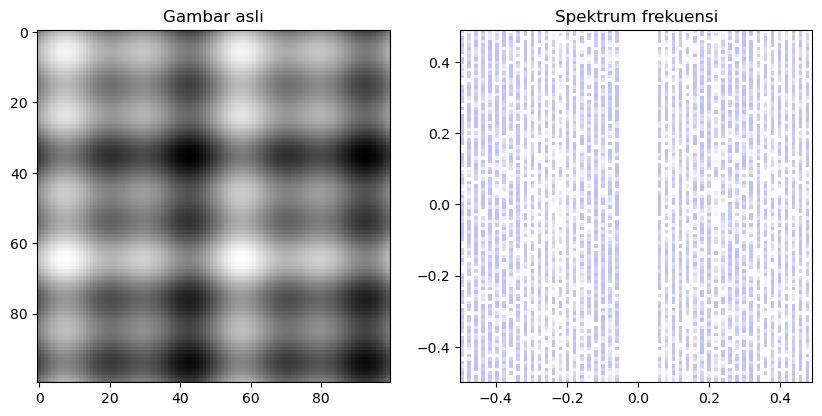

In [28]:
# Buka file gambar PNG
im = Image.open(foto)

# Konversi gambar menjadi array numpy
arr = np.array(im)

# Lakukan FFT 2-D
arr_fft = np.fft.fft2(np.fft.ifftshift(arr))

# Dapatkan ukuran gambar dan frekuensi sampel
width, height = im.size
freq_x = np.fft.fftfreq(width)
freq_y = np.fft.fftfreq(height)
# Konversi gambar menjadi array numpy
im_arr = np.array(im)

# normalisasi
im_norm = im_arr.astype(np.float32) / 255.0

# Plot gambar dan spektrum frekuensi
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(arr, cmap='gray')
axs[0].set_title('Gambar asli')

axs[1].imshow(np.log10(np.abs(np.fft.fftshift(arr_fft))), cmap='gray', extent=[freq_x.min(), freq_x.max(), freq_y.min(), freq_y.max()])
axs[1].set_title('Spektrum frekuensi')
print (im_norm)